In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

#Read CSV
mouse_drug = pd.read_csv("../data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("../data/clinicaltrial_data.csv")

# Merge our two data frames together
pharma_data_df = pd.merge(mouse_drug, clinical_trial, how="left", on="Mouse ID")
pharma_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [3]:
#Combine the data into a single dataset
pharma_data_df = pd.merge(mouse_drug, clinical_trial, how="left", on=["Mouse ID","Mouse ID"])


# Display the data table for preview

pharma_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Combining Outputs Option: groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
Mean_Tumor_Vol= pharma_data_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

Mean_Tumor_Vol_df= pd.DataFrame(Mean_Tumor_Vol)

Mean_Tumor_Vol_df=Mean_Tumor_Vol_df.reset_index()

#Mean_Tumor_Vol

print(f"Mean Tumor Volume Data Grouped by Drug and Timepoint ​is: {round(Mean_Tumor_Vol.mean(),2)}")

# Preview DataFrame
Mean_Tumor_Vol_df.head()

Mean Tumor Volume Data Grouped by Drug and Timepoint ​is: 52.35


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#Assign each variable Assign the tumor value averages to a data frame
tumor_mean_df = Mean_Tumor_Vol_df.reset_index()
tumor_mean_df_in_pivot = tumor_mean_df .pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_mean_df_in_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_Tumor_Vol= pharma_data_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

SEM_Tumor_Vol_df= pd.DataFrame(SEM_Tumor_Vol)

#SEM_Tumor_Vol_df=SEM_Tumor_Vol_df.reset_index

#print(f"The standard deviation of Tumor Volumes Grp'd by Drug and TimePoint is: {round(SEM_Tumor_Vol_df.sem(),2)}")

# Preview DataFrame
SEM_Tumor_Vol_df.reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [7]:
#Assign each variable Assign the tumor value averages to a data frame
tumor_sem_df = SEM_Tumor_Vol_df.reset_index()
tumor_sem_df_in_pivot =tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_sem_df_in_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


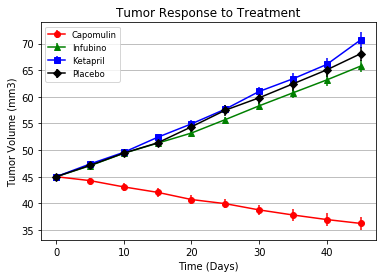

In [8]:
# Generate the Plot (with Error Bars)
capo=plt.errorbar(tumor_mean_df_in_pivot.index,
             tumor_mean_df_in_pivot['Capomulin'], 
             yerr = tumor_sem_df_in_pivot['Capomulin'], 
             marker = "o", 
             color="r")
infu=plt.errorbar(tumor_mean_df_in_pivot.index,
             tumor_mean_df_in_pivot['Infubinol'], 
             yerr = tumor_sem_df_in_pivot['Infubinol'], 
             marker = "^", 
             color = "g")
keta=plt.errorbar(tumor_mean_df_in_pivot.index,
             tumor_mean_df_in_pivot['Ketapril'], 
             yerr = tumor_sem_df_in_pivot['Ketapril'], 
             marker = "s", 
             color = "b")
plac=plt.errorbar(tumor_mean_df_in_pivot.index,
             tumor_mean_df_in_pivot['Placebo'], 
             yerr = tumor_sem_df_in_pivot['Placebo'], 
             marker = "D", 
             color= "k")

plt.legend(['Capomulin','Infubino','Ketapril','Placebo'],loc="best", fontsize="small")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
ax = plt.axes()        
ax.yaxis.grid()

# Save the Figure
plt.savefig("VolumeErrorBar.png")
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame

Mean_MetSites= pharma_data_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

Mean_MetSites_df= pd.DataFrame(Mean_MetSites)

Mean_MetSites_df=Mean_MetSites_df.reset_index()


print(f"Mean Met Site Grouped by Drug and Timepoint ​is: {round(Mean_MetSites_df.mean(),2)}")

# Preview DataFrame
Mean_MetSites_df.head()

Mean Met Site Grouped by Drug and Timepoint ​is: Timepoint           22.50
Metastatic Sites     1.22
dtype: float64


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Minor Data Munging to Re-Format the Data Frames
#Assign each variable Assign the tumor value averages to a data frame
MS_mean_df = Mean_MetSites_df.reset_index()
MS_mean_df_in_pivot = MS_mean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

MS_mean_df_in_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame

SEM_Metsites= pharma_data_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

SEM_Metsites_df=pd.DataFrame(SEM_Metsites)

#SEM_Metsites_df=SEM_Metsites_df.reset_index()

#print(f"The standard deviation of Met.Site Grp'd by Drug and TimePoint is: {round(SEM_Metsites.sem(),2)}")

# Convert to DataFrame

# Preview DataFrame
SEM_Metsites_df.reset_index()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [12]:
# Minor Data Munging to Re-Format the Data Frames

#Assign each variable Assign to a data frame
MS_sem_df = SEM_Metsites_df.reset_index()
MS_sem_df_in_pivot =MS_sem_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]



# Preview that Reformatting worked
MS_sem_df_in_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


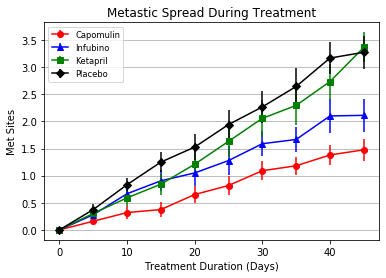

In [13]:
# Generate the Plot (with Error Bars)
capo=plt.errorbar(MS_mean_df_in_pivot.index,
             MS_mean_df_in_pivot['Capomulin'], 
             yerr = MS_sem_df_in_pivot['Capomulin'], 
             marker = "o", 
             color="r")
infu=plt.errorbar(MS_mean_df_in_pivot.index,
             MS_mean_df_in_pivot['Infubinol'], 
             yerr = MS_sem_df_in_pivot['Infubinol'], 
             marker = "^", 
             color = "b")
keta=plt.errorbar(MS_mean_df_in_pivot.index,
             MS_mean_df_in_pivot['Ketapril'], 
             yerr = MS_sem_df_in_pivot['Ketapril'], 
             marker = "s", 
             color = "g")
plac=plt.errorbar(MS_mean_df_in_pivot.index,
             MS_mean_df_in_pivot['Placebo'], 
             yerr = MS_sem_df_in_pivot['Placebo'], 
             marker = "D", 
             color= "black")

plt.legend(['Capomulin','Infubino','Ketapril','Placebo'],loc="best", fontsize="small")
plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
ax = plt.axes()        
ax.yaxis.grid()

# Save the Figure
plt.savefig("MetasticErrorBar.png")
plt.show()# 


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame

Mice_Ct= pharma_data_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

Mice_Ct_df=pd.DataFrame(Mice_Ct)

print(f"The count of Mice Grouped by Drug and Timepoint is: {round(Mice_Ct_df.count(),2)}")

# Preview DataFrame
Mice_Ct_df.reset_index()


The count of Mice Grouped by Drug and Timepoint is: Mouse ID    100
dtype: int64


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [15]:
# Minor Data Munging to Re-Format the Data Frames

#Assign each variable Assign  to a data frame
Mice_Ct_df= Mice_Ct_df.reset_index()
Mice_Ct_df_in_pivot = Mice_Ct_df.pivot(index="Timepoint", columns="Drug")["Mouse ID"]

# Preview that Reformatting worked
Mice_Ct_df_in_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


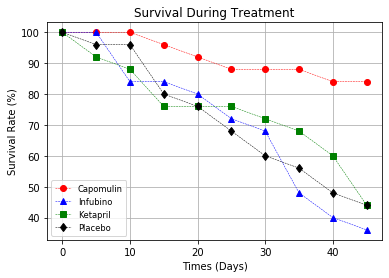

In [16]:
# Generate the Plot (Accounting for percentages)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),
                    ('Ketapril','s','green'),('Placebo','d','black')]
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_format_list:
    SurvivingMice = Mice_Ct_df_in_pivot[drug][0]
    surviving_rate = (Mice_Ct_df_in_pivot[drug]/SurvivingMice )*100
    survival_treatment_plt = plt.plot(Mice_Ct_df_in_pivot.index,surviving_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(['Capomulin','Infubino','Ketapril','Placebo'],loc="best", fontsize="small")
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("SurvivalErrorBar.png")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

pct_change_mean =  100 * (tumor_mean_df_in_pivot.iloc[-1] - tumor_mean_df_in_pivot.iloc[0]) / tumor_mean_df_in_pivot.iloc[0]
pct_change_sem =  100 * (tumor_sem_df_in_pivot.iloc[-1] - tumor_sem_df_in_pivot.iloc[0]) / tumor_sem_df_in_pivot.iloc[0]

pct_change_mean= pct_change_mean.drop(["Ceftamin","Naftisol","Propriva","Ramicane", "Stelasyn","Zoniferol"])


# Display the data to confirm
pct_change_mean

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

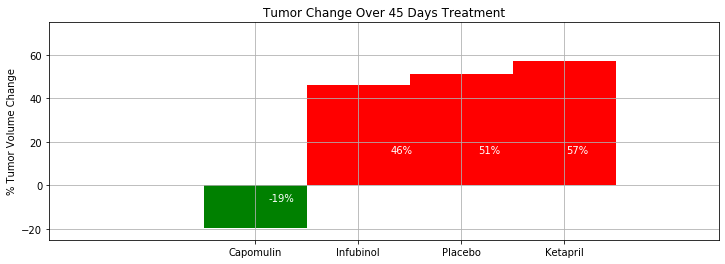

In [37]:
# Store all Relevant Percent Changes into a Tuple
pct_chg = (pct_change_mean.sort_values(ascending=True))


# Splice the data between passing and failing drugs
drugfail = pct_chg[pct_chg < 0].sort_values(ascending=True)
drugpass = pct_chg[pct_chg >= 0].sort_values(ascending=True)


# Use functions to label the percentages of changes
plt.figure(figsize=(12,4))

# Call functions to implement the function calls
neg_axis=plt.bar(drugfail.index.values, drugfail.values, color="g", width=1, label="%")
pos_axis=plt.bar(drugpass.index.values, drugpass.values, color="r", width=1, label="%")    

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-2,len(pct_chg)+0.5)
plt.ylim(-25,75)
plt.grid()

#Adding the % label 

for bar in neg_axis: 
    x_bar=bar.get_x()
    w_bar=bar.get_width()
    x_text= (x_bar+w_bar)/2.0
    bar_height= bar.get_height()
    plt.text(x_text,-7,"%d%%"%int(bar_height), ha="center", color="w",) 
    
for bar in pos_axis: 
    xp_bar=bar.get_x()
    wp_bar=bar.get_width()
    xp_text= ((xp_bar*1.7)+wp_bar)/2.0
    barp_height= bar.get_height()
    plt.text(xp_text+.5,15,"%d%%"%int(barp_height), ha="center", color="w",) 

# Save the Figure
plt.savefig("SummaryBar.png")

# Show the Figure
plt.show()

In [19]:
#neg_axis[0].get_height()


![Metastatic Spread During Treatment](../Images/change.png)